# K-Nearest Neighbors (Happiness Prediction)

## Penjelasan Kolom

###
- infoavail = the availability of information about the city services
- housecost = the cost of housing
- schoolquality = the overall quality of public schools
- policetrust = your trust in the local police
- streetquality = the maintenance of streets and sidewalks
- events = the availability of social community events
- happy = decision attribute (D) with values 0 (unhappy) and 1 (happy)

## A. Data Preparation

### A.1 Import Libraries

In [184]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("ggplot")
sns.set(style='darkgrid', font_scale=1.1)

### A.2 Load Data

In [185]:
try:
 df = pd.read_csv("happydata.csv")
 print("Berhasil membaca data")
except Exception as e:
 print(f"Gagal Membaca data as {e}")

Berhasil membaca data


### A.3 Melihat Dimensi Data

In [186]:
df.shape

(143, 7)

### A.4 Melihat Informasi Data

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   infoavail      143 non-null    int64
 1   housecost      143 non-null    int64
 2   schoolquality  143 non-null    int64
 3   policetrust    143 non-null    int64
 4   streetquality  143 non-null    int64
 5   ëvents         143 non-null    int64
 6   happy          143 non-null    int64
dtypes: int64(7)
memory usage: 7.9 KB


### A.5 Melihat Deskripsi Data

In [188]:
df.describe()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,4.314685,2.538462,3.265734,3.699301,3.615385,4.216783,0.538462
std,0.799820,1.118155,0.992586,0.888383,1.131639,0.848693,0.500271
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000,0.000000
50%,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000,1.000000
75%,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


### A.6 Melihat 5 Data Teratas dan 5 Data Terbawah

In [189]:
df.head()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
4,5,4,3,3,3,5,0


In [190]:
df.tail()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
138,5,3,3,1,3,5,0
139,5,2,3,4,2,5,1
140,5,3,3,4,4,5,1
141,4,3,3,4,4,5,0
142,5,3,2,5,5,5,0


### A.7 Melihat Data Duplikat

In [191]:
df.duplicated().sum()

np.int64(18)

In [192]:
df.drop_duplicates(inplace=True)

### A.8 Melihat Data Hilang

In [193]:
df.isna().sum()

infoavail        0
housecost        0
schoolquality    0
policetrust      0
streetquality    0
ëvents           0
happy            0
dtype: int64

### A.9 Melihat Data Outliers

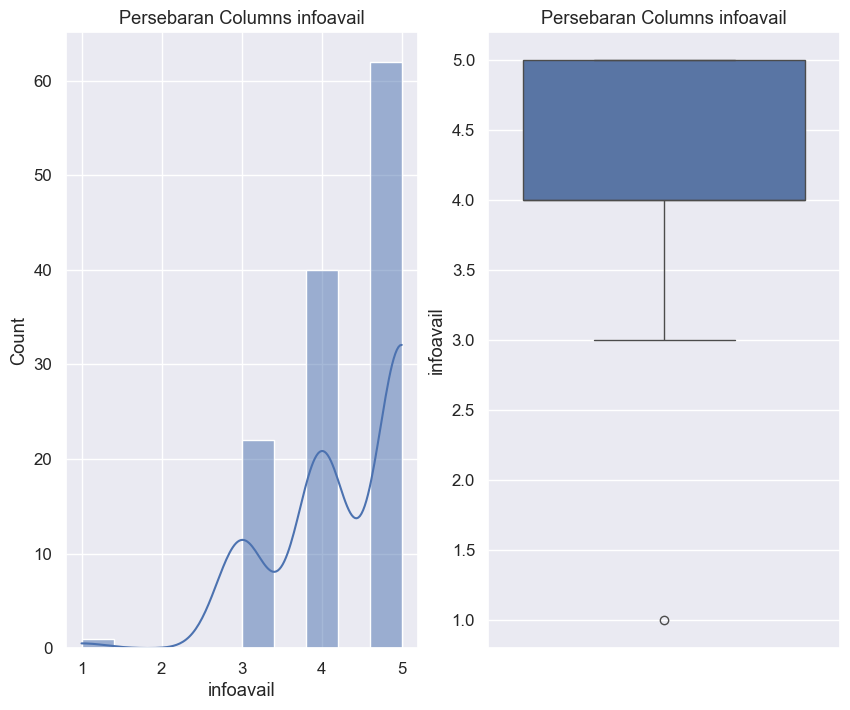

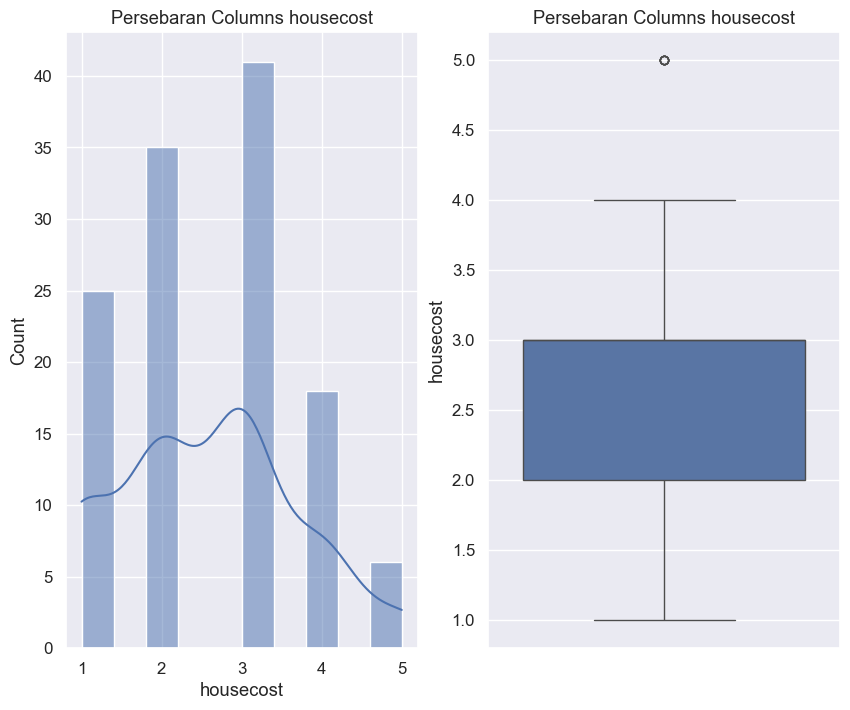

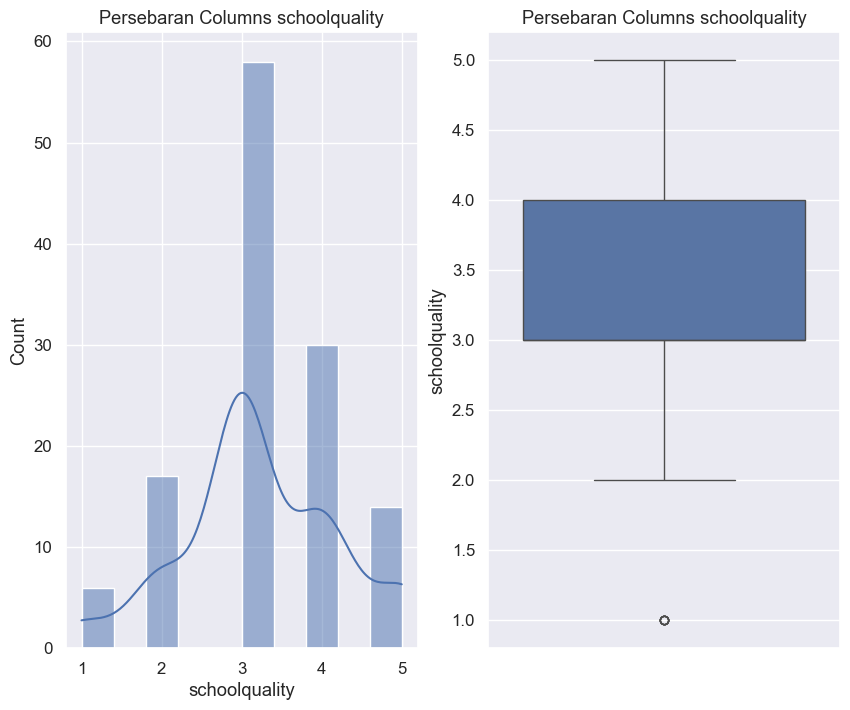

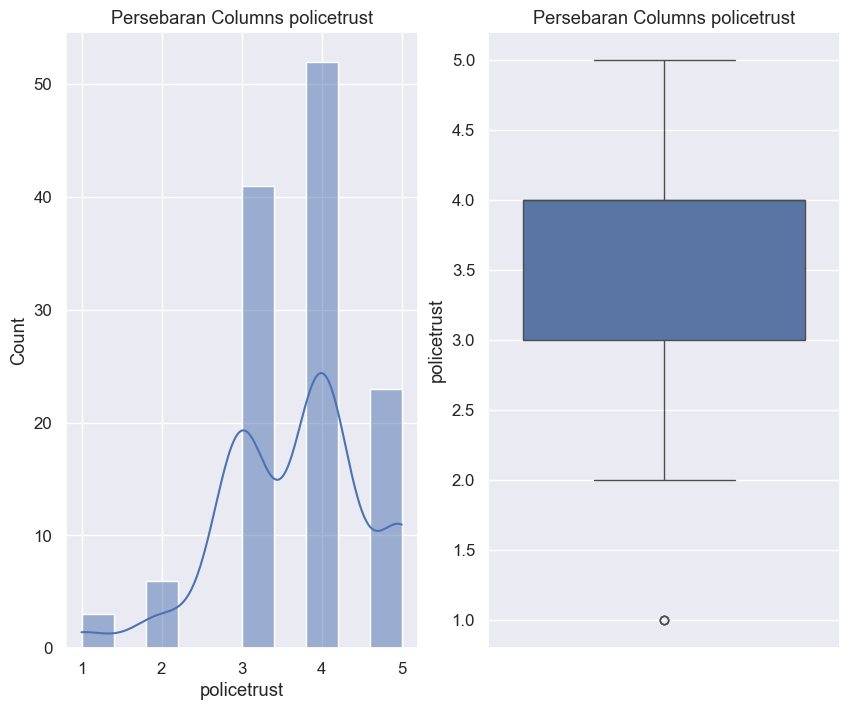

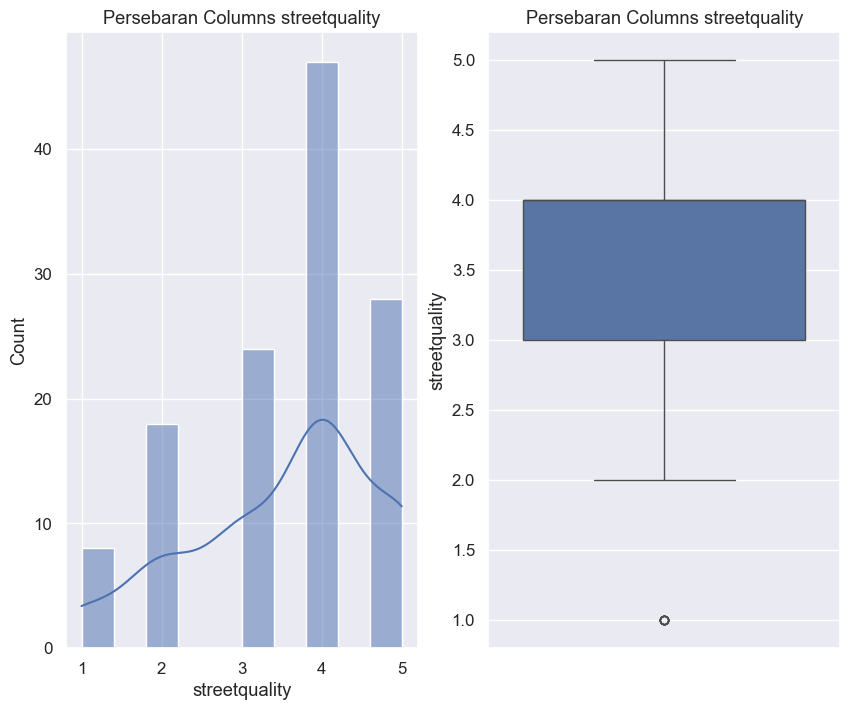

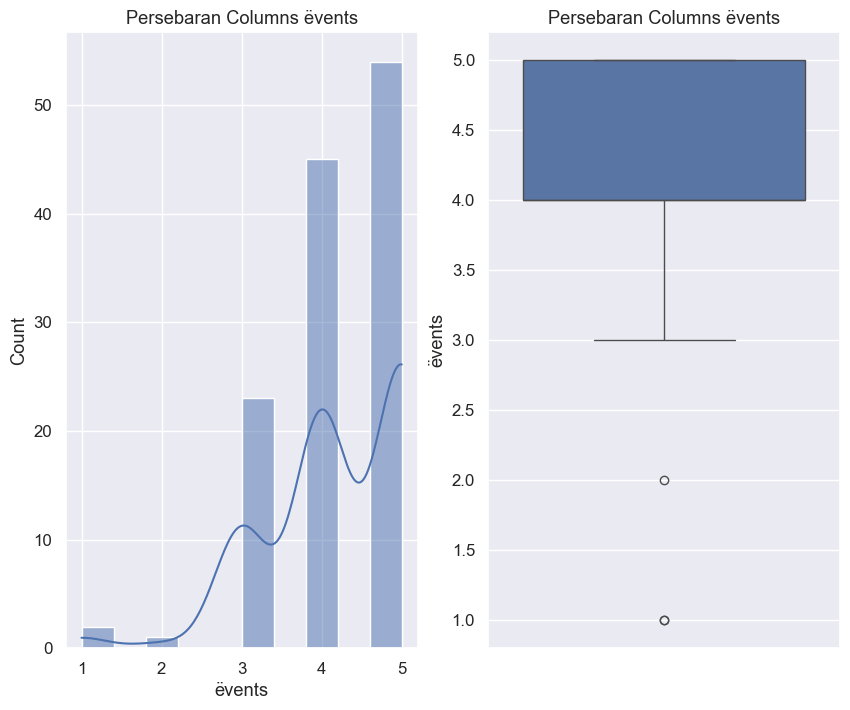

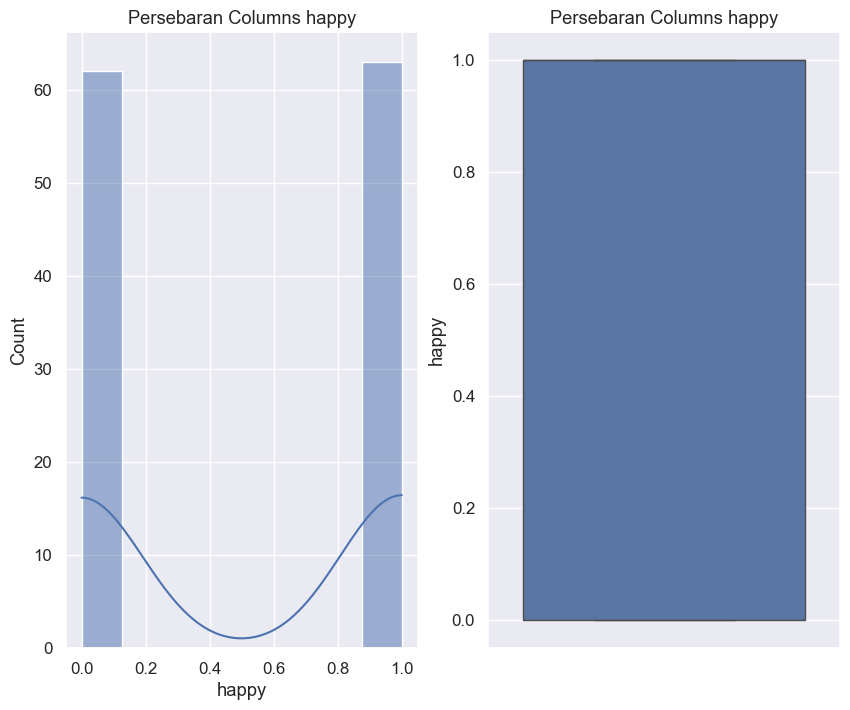

In [194]:
for col in df.select_dtypes(include='number'):
 fig, axes = plt.subplots(1,2, figsize=(10, 8))
 sns.histplot(df[col], ax = axes[0], kde=True)
 axes[0].set_title(f"Persebaran Columns {col}")

 sns.boxplot(df[col], ax = axes[1])
 axes[1].set_title(f"Persebaran Columns {col}")

## B. Exploratory Data Analysis (EDA)

### B.1 Univariate Analysis

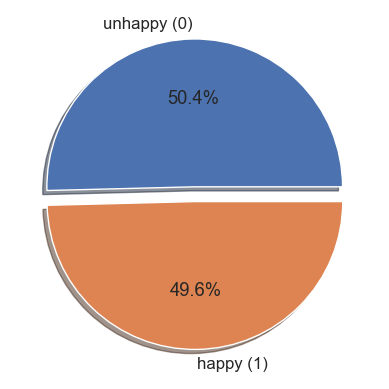

In [195]:
label = ['unhappy (0)', 'happy (1)']


df['happy'].value_counts().plot(
 kind='pie',
 labels = label,
 autopct='%1.1f%%',
 shadow = True,
 explode = (0.05, 0.05),
 )

plt.ylabel("")
plt.show()

<Figure size 1400x1200 with 0 Axes>

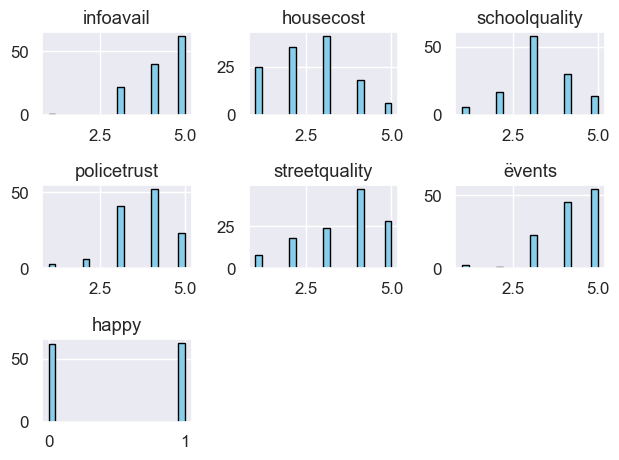

In [196]:
plt.figure(figsize=(14, 12))
df.select_dtypes(include='number').hist(bins =20, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

### B.2 Bivariate Analysis

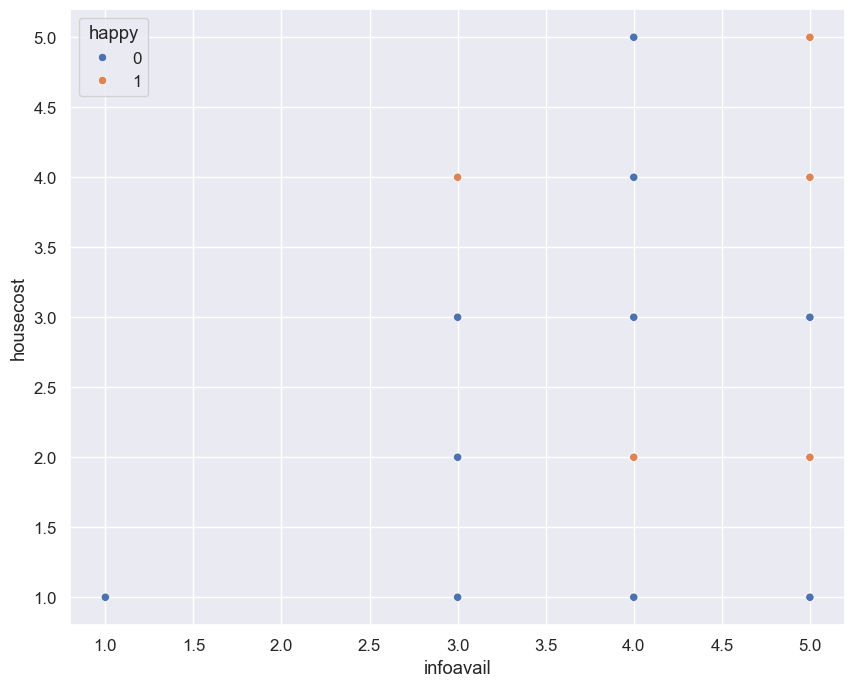

In [197]:
plt.figure(figsize=(10, 8))
sns.scatterplot(df, x='infoavail', y='housecost', hue='happy')
plt.show()

### B.3 Multivariate Analysis

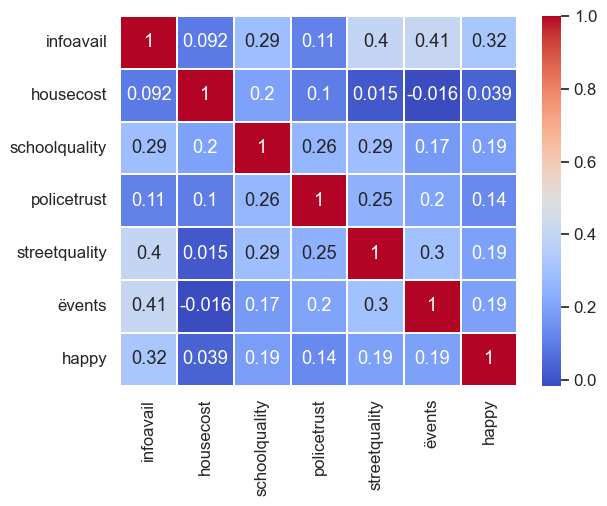

In [198]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=1.1)
plt.show()

## C. Data Preprocessing

### C.1 Resampling Label

In [199]:
minor = df[df['happy'] == 1]
major = df[df['happy'] == 0]

length = len(major)

minor_oversampled = minor.sample(n=length, replace=True, random_state=42)
df = pd.concat([major, minor_oversampled])

In [200]:
df['happy'].value_counts()

happy
0    62
1    62
Name: count, dtype: int64

### C.2 Standarisasi

In [201]:
features = df.drop(columns=['happy', 'housecost', 'policetrust'])
target = df['happy']

In [202]:
features = (features - features.mean(axis=0)) / features.std(axis=0)

### C.3 Normalisasi

In [203]:
# features = (features - features.min()) / (features.max() - features.min())

## D.Modelling

### D.1 Defining X (Features) & y (Target) Variables

In [204]:
X_data = features
y_data = target

### D.2 Splitting Train Data and Test Data (80:20)

In [205]:
# fungsi untuk bagi data
def stratified_split_data(X, y, train_size=0.8, random_state=42):
    np.random.seed(random_state)
    
    X_train_list, X_test_list = [], []   
    y_train_list, y_test_list = [], [] 
    
    for class_value in np.unique(y):
        class_idx = np.where(y == class_value)[0]
        
        idx = np.random.permutation(class_idx)
        split_ratio = int(len(idx) * train_size)
        
        X_train_list.append(X.iloc[idx[:split_ratio]])
        X_test_list.append(X.iloc[idx[split_ratio:]])
        y_train_list.append(y.iloc[idx[:split_ratio]])
        y_test_list.append(y.iloc[idx[split_ratio:]])

    X_train = pd.concat(X_train_list).reset_index(drop=True)
    X_test = pd.concat(X_test_list).reset_index(drop=True)
    y_train = pd.concat(y_train_list).reset_index(drop=True)
    y_test = pd.concat(y_test_list).reset_index(drop=True)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = stratified_split_data(X_data, y_data)

### D.3 K-Nearest Neighbors

In [206]:
class KNN:
    def __init__(self, k, p):
        self.K = k
        self.P = p
        
    def train(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def jarak(self, x1, x2):
        if self.P == 1:
            return np.sum(np.abs(x1 - x2))
        else:
            return np.sqrt(np.sum((x1 - x2) ** 2))
        
    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)
    
    def _predict(self, x):
        jaraks = [self.jarak(x, x_train) for x_train in self.X_train]
        best_k = np.argsort(jaraks)[:self.K]
        label_k = [self.y_train[i] for i in best_k]
        hasil = max(set(label_k), key=label_k.count)
        return hasil

### D.4 Elbow Method (For Optimal K)

#### Euclidean Distance

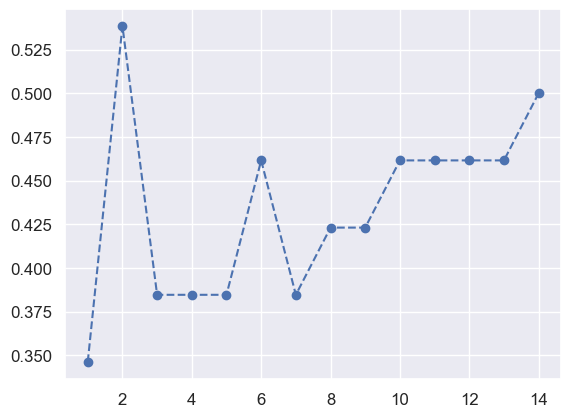

In [207]:
errors = []
range_k = range(1, 15)

for k in range_k:
    model = KNN(k, 2)
    model.train(X_train.values, y_train.values)
    pred = model.predict(X_test.values)
    error = np.mean(pred != y_test.values)
    errors.append(error)
    
plt.plot(range_k, errors, marker='o', linestyle='--')
plt.show()

#### Manhattan Distance

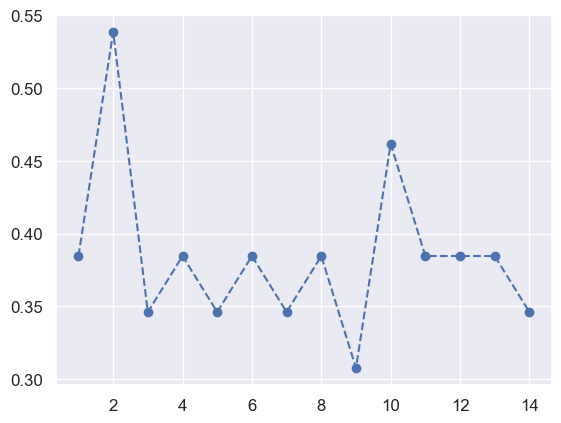

In [208]:
errors = []
range_k = range(1, 15)

for k in range_k:
    model = KNN(k, 1)
    model.train(X_train.values, y_train.values)
    pred = model.predict(X_test.values)
    error = np.mean(pred != y_test.values)
    errors.append(error)
    
plt.plot(range_k, errors, marker='o', linestyle='--')
plt.show()

### D.5 Grid-Search for Optimal K and Best Distance

In [209]:
best_acc = 0
best_params = {}

for k in [3, 5, 7, 9, 11]:
    for p in [1, 2]:
        model = KNN(k, p)
        model.train(X_train.values, y_train.values)
        pred = model.predict(X_test.values)
        acc = np.mean(pred == y_test.values)
        
        if acc > best_acc:
            best_acc = acc
            best_params = {'k' : k, 'p' : p}
            
nama_jarak = "Manhattan" if best_params['p'] == 1 else "Euclidean"
print(f"Best K: {best_params['k']} | Best Jarak: {nama_jarak} | Best Akurasi: {best_acc}")

Best K: 9 | Best Jarak: Manhattan | Best Akurasi: 0.6923076923076923


## E. Evaluasi

### E.1 Akurasi

In [210]:
model = KNN(9, 1)
model.train(X_train.values, y_train.values)

y_pred_test = model.predict(X_test.values)
y_pred_train = model.predict(X_train.values)

#### Akurasi Test

In [211]:
test_accuracy = np.mean(y_pred_test == y_test.values)
test_accuracy

np.float64(0.6923076923076923)

#### Akurasi Train

In [212]:
train_accuracy = np.mean(y_pred_train == y_train.values)
train_accuracy

np.float64(0.7755102040816326)

### E.2 Confusion Matrix

In [213]:
y_pred_array = np.array(y_pred_test)
y_test_array = np.array(y_test.values)

TP = np.sum((y_pred_array == 1) & (y_test_array == 1))
FP = np.sum((y_pred_array == 1) & (y_test_array == 0))
TN = np.sum((y_pred_array == 0) & (y_test_array == 0))
FN = np.sum((y_pred_array == 0) & (y_test_array == 1))

print(f"True Positives: {TP}")
print(f"False Positives: {FP}")
print(f"True Negatives: {TN}")
print(f"False Negatives: {FN}")

True Positives: 11
False Positives: 6
True Negatives: 7
False Negatives: 2


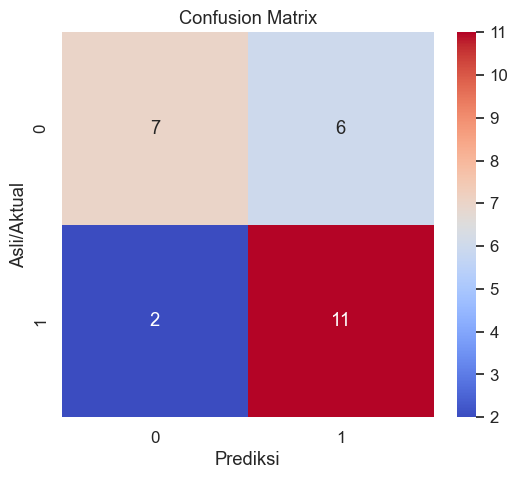

In [214]:
cm = np.array([
    [TN, FP],
    [FN, TP]
])

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Prediksi")
plt.ylabel("Asli/Aktual")
plt.show()

### E.3 Precision

In [215]:
precision = TP / (TP + FP)
precision

np.float64(0.6470588235294118)

### E.4 Recall 

In [216]:
recall = TP / (TP + FN)
recall

np.float64(0.8461538461538461)

### E.5 F-1 Score

In [218]:
f1 = 2 * (precision * recall / precision + recall)
f1

np.float64(3.3846153846153846)

### E.6 Decision Boundary Visualization

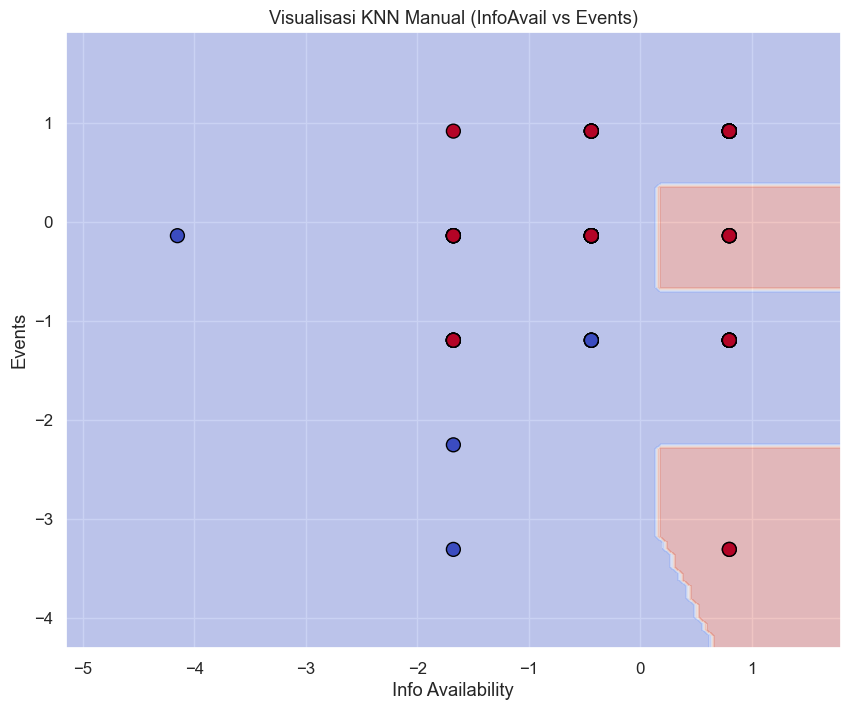

In [222]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. PERSIAPAN DATA ---
# Kita pakai 2 fitur terbaik: 'infoavail' (kolom 0) dan 'events' (kolom 5)
# Sesuaikan index kolom kalau beda urutan di CSV mu
# Asumsi: infoavail ada di index 0, events ada di index 5
X_vis = X_data[['infoavail', 'ëvents']].values
y_vis = y_data.values

# --- 2. LATIH MODEL MANUAL ---
# Panggil Class KNN buatanmu (Pastikan Class KNN sudah di-run sebelumnya)
# Kita pakai K=5 (atau ganti sesuai Best K kamu)
model_vis = KNN(k=5, p=2) 
model_vis.train(X_vis, y_vis) # Pake .train() bukan .fit()

# --- 3. BIKIN LANTAI (GRID) ---
# Kasih margin +1 dan -1 biar gambar gak mepet pinggir
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1

# Bikin 100x100 titik (Resolusi)
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# --- 4. TEBAK WARNA LANTAI ---
# Gabungin titik X dan Y jadi array 2D
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Prediksi pakai model manualmu
# Karena manual, ini mungkin butuh waktu 5-10 detik (sabar ya)
Z = model_vis.predict(grid_points) 
Z = Z.reshape(xx.shape) # Kembalikan ke bentuk kotak 100x100

# --- 5. GAMBAR ---
plt.figure(figsize=(10, 8))

# Gambar Wilayah (Lantai)
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)

# Gambar Titik Asli (Orangnya)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap='coolwarm', edgecolors='black', s=100)

plt.title("Visualisasi KNN Manual (InfoAvail vs Events)")
plt.xlabel("Info Availability")
plt.ylabel("Events")
plt.show()